<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1">Libraries</a></span></li><li><span><a href="#Data-fetching" data-toc-modified-id="Data-fetching-2">Data fetching</a></span></li><li><span><a href="#Data-scrubbing" data-toc-modified-id="Data-scrubbing-3">Data scrubbing</a></span></li><li><span><a href="#Dataset-readability" data-toc-modified-id="Dataset-readability-4">Dataset readability</a></span></li><li><span><a href="#Dataset-cleaning" data-toc-modified-id="Dataset-cleaning-5">Dataset cleaning</a></span></li><li><span><a href="#Dataset-export" data-toc-modified-id="Dataset-export-6">Dataset export</a></span></li></ul></div>

# Libraries

In [1]:
import os

# visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data fetching

In [2]:
# define csv file os path
csv_path = os.path.join('../data/train/raw/data.csv')

In [3]:
# import data and storing into pandas dataframe
df_raw = pd.read_csv(csv_path)

--------------

# Data scrubbing

In [4]:
# dataset overview
df_raw.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# dataset summary
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# dataset missing values overview check
df_raw.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [18]:
# dataset duplicates check
df_raw.duplicated().value_counts() / len(df_raw) * 100

False    100.0
dtype: float64

-----------------------

# Dataset readability

In [55]:
# renaming columns for better readability
df_raw.columns = df_raw.columns.str.lower()

In [56]:
# underscore column header name split
df_raw.columns = [col.replace("pixel", "pixel_") for col in df_raw.columns]

-----------------------------

# Exploratory data analysis

## Data selection

In [7]:
# split dataset into features/label sets
X = df_raw.drop("label", axis=1)
y = df_raw.label

## Data frequency

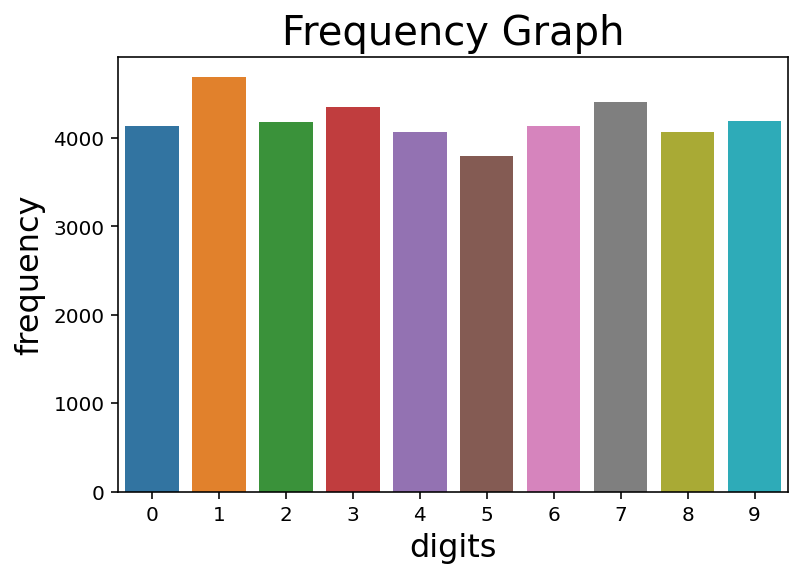

In [97]:
# plot instances frequency per digit
sns.countplot(data=X, x=y)

plt.xlabel("digits",fontsize=16)
plt.ylabel("frequency",fontsize=16)
plt.title("Frequency Graph",fontsize=20)
# plt.savefig('../reports/figures/digit_frequency.png')
plt.show()

## Multivariate analysis

## Data dimensionality

In [8]:
# add 3d dimension for image plot
X = np.expand_dims(X, axis=+2)

### Data normalization

Each pixel values lies between [0,255]. This value range is too high and it will be difficult for any model to learn. The best approach is **normalize** the data. In this case, as the pixel value is in the known range it sufficient to **scale the pixel values** in range [0,1] by simply dividing the array by **255**.

In [9]:
# normalizing pixels to convert into digit image
digit_img = X/255.0

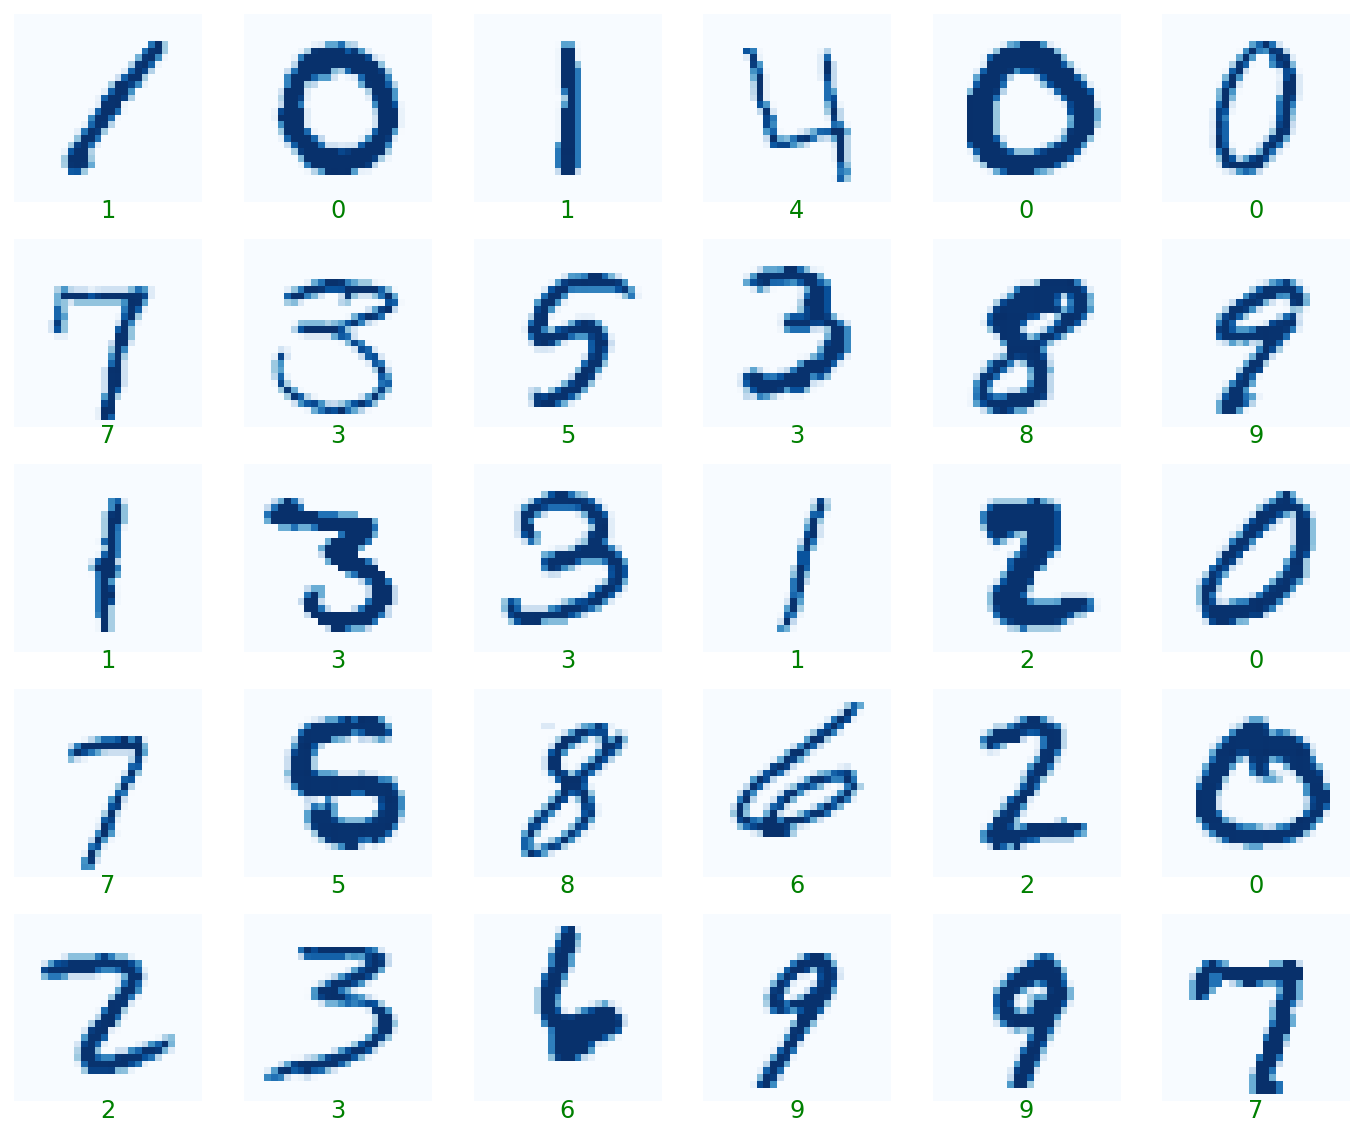

In [100]:
rows = 5 # defining no. of rows
cols = 6 # defining no. of columns

f = plt.figure(figsize=(2*cols, 2*rows)) # defining a figure

for i in range(rows*cols):
    f.add_subplot(rows, cols, i+1) # adding sub plot to figure on each iteration
    plt.imshow(digit_img[i].reshape([28,28]), cmap="Blues")
    plt.axis("off")
    plt.title(str(y[i]), y=-0.15, color="green")
plt.savefig("../reports/figures/digits_plot.png")

# Dataset cleaning

There are no either missing data or duplicates in this dataset.

In [13]:
# define cleaned dataset
df = df_raw

-----------------------------